In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


 Type of 'train_X' is  <class 'numpy.ndarray'>
 Shape of 'train_X' is (1, 50)
 Type of 'train_Y' is  <class 'numpy.ndarray'>
 Shape of 'train_Y' is (1, 50)


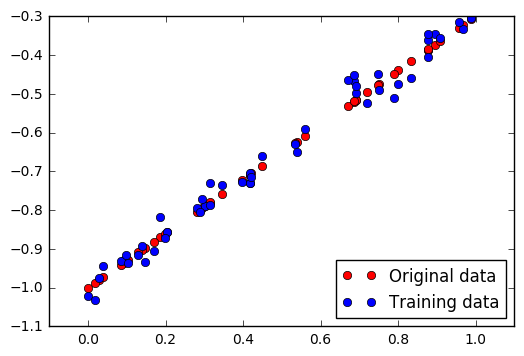

In [18]:
#Generate training data
np.random.seed(1)

def f(x, a, b):
    n    = train_X.size
    vals = np.zeros((1, n))
    for i in range(0, n):
        ax  = np.multiply(a, x.item(i))
        val = np.add(ax, b)
        vals[0, i] = val
    return vals

Wref = 0.7
bref = -1.
n    = 50
noise_var = 0.001

train_X   = np.random.random((1, n))
ref_Y     = f(train_X, Wref, bref)
train_Y   = ref_Y + np.sqrt(noise_var)*np.random.randn(1, n)

print (" Type of 'train_X' is ", type(train_X))
print (" Shape of 'train_X' is %s" % (train_X.shape,))
print (" Type of 'train_Y' is ", type(train_Y))
print (" Shape of 'train_Y' is %s" % (train_Y.shape,))

# Plot
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.axis('equal')
plt.legend(loc='lower right')

In [8]:
train_X

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
        1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
        3.96767474e-01, 5.38816734e-01, 4.19194514e-01, 6.85219500e-01,
        2.04452250e-01, 8.78117436e-01, 2.73875932e-02, 6.70467510e-01,
        4.17304802e-01, 5.58689828e-01, 1.40386939e-01, 1.98101489e-01]])

In [9]:
ref_Y

array([[-0.7080846 , -0.49577285, -0.99991994, -0.7883672 , -0.89727088,
        -0.93536298, -0.86961785, -0.75810749, -0.72226277, -0.62282829,
        -0.70656384, -0.52034635, -0.85688343, -0.38531779, -0.98082868,
        -0.53067274, -0.70788664, -0.60891712, -0.90172914, -0.86132896]])

In [10]:
train_Y

array([[-0.67223166, -0.53055447, -1.0053726 , -0.81612752, -0.89593596,
        -0.91693275, -0.90442249, -0.72190815, -0.69375197, -0.60693802,
        -0.67807627, -0.54196772, -0.86076956, -0.41490942, -0.98930005,
        -0.51390143, -0.72975887, -0.62146357, -0.92345945, -0.88805671]])

In [27]:
#Linear Regression

#Params
training_epochs = 2000
display_step = 100

#Set TF graph
X = tf.placeholder(dtype=tf.float32, name='input')
Y = tf.placeholder(dtype=tf.float32, name='output')

#Weights and Biases
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

#Activation
activation = tf.add(tf.multiply(X, W), b)

#Loss and optimizer
learning_rate = 0.01
loss = tf.reduce_mean(tf.pow(activation-Y, 2))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) #Gradient descent

#Init
init = tf.global_variables_initializer()

In [29]:
#Training phase
sess = tf.Session()
#Init
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(train_X[0,:], train_Y[0,:]):
#         print('x: ', x, 'y: ', y)
        sess.run(optimizer, feed_dict={X:x, Y:y})
        
    #Check loss
    if epoch % display_step == 0:
        lossval = sess.run(loss, feed_dict={X: train_X, Y: train_Y})
        print('Epoch: %04d, cost= %.5f' % (epoch+1, lossval))
        Wtemp = sess.run(W)
        btemp = sess.run(b)
        print('Wtemp is: %.4f, btemp is: %.4f' % (Wtemp, btemp))
        print('Wref is: %.4f, bref is: %.4f' % (Wref, bref))
    

Epoch: 0001, cost= 0.08565
Wtemp is: -0.2453, btemp is: -0.5604
Wref is: 0.7000, bref is: -1.0000
Epoch: 0101, cost= 0.00082
Wtemp is: 0.7073, btemp is: -0.9992
Wref is: 0.7000, bref is: -1.0000
Epoch: 0201, cost= 0.00082
Wtemp is: 0.7078, btemp is: -0.9995
Wref is: 0.7000, bref is: -1.0000
Epoch: 0301, cost= 0.00082
Wtemp is: 0.7078, btemp is: -0.9995
Wref is: 0.7000, bref is: -1.0000
Epoch: 0401, cost= 0.00082
Wtemp is: 0.7078, btemp is: -0.9995
Wref is: 0.7000, bref is: -1.0000
Epoch: 0501, cost= 0.00082
Wtemp is: 0.7078, btemp is: -0.9995
Wref is: 0.7000, bref is: -1.0000
Epoch: 0601, cost= 0.00082
Wtemp is: 0.7078, btemp is: -0.9995
Wref is: 0.7000, bref is: -1.0000
Epoch: 0701, cost= 0.00082
Wtemp is: 0.7078, btemp is: -0.9995
Wref is: 0.7000, bref is: -1.0000
Epoch: 0801, cost= 0.00082
Wtemp is: 0.7078, btemp is: -0.9995
Wref is: 0.7000, bref is: -1.0000
Epoch: 0901, cost= 0.00082
Wtemp is: 0.7078, btemp is: -0.9995
Wref is: 0.7000, bref is: -1.0000
Epoch: 1001, cost= 0.00082
Wt

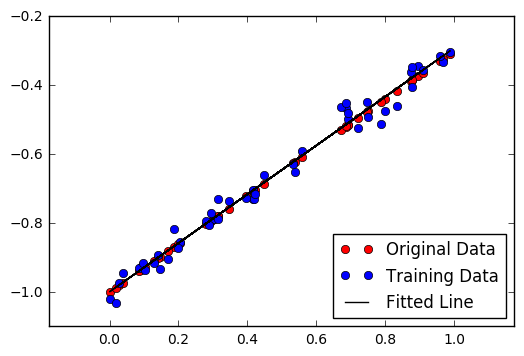

In [30]:
#Final W and b
W_final = sess.run(W)
b_final = sess.run(b)
f_final = f(train_X, W_final, b_final)

#Plot results
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original Data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training Data')
plt.plot(train_X[0, :], f_final[0, :], 'k-', label='Fitted Line')
plt.axis('equal')
plt.legend(loc='lower right')